## Point Operator

- Pixel transforms
- Color transforms
- compositing and matting
- Histogram equalization
- Tonal adjustment

## Point-wise intensity transformations – pixel transformation

- Image negatives
- Color space transformation
- Log transform
- Power-law transformation
- Contrast stretching
- Scalar quantization
- Thresholding

## Constructing and Building Histograms

<font size="3"><b>Histograms</b> are a powerful technique used to better understand image content. For example, many cameras display in real time the histogram of the scene that is being captured in order to adjust some parameters of the camera acquisition (for example, exposure time, brightness, or contrast) with the purpose of capturing appropriate images and helping detect image acquisition issues.</font>

<font size="3">An image histogram is a type of histogram that reflects the tonal distribution of the image, plotting the number of pixels for each tonal value. The number of pixels for each tonal value is also called frequency. Therefore, a histogram for a grayscale image with intensity values in the range [0, K-1] would contain exactly K entries. For example, in the case of 8-bit grayscale images, K = 256 (28 = 256), and hence, the intensity values are in the range [0, 255]. Each entry of the histogram is defined as</font>

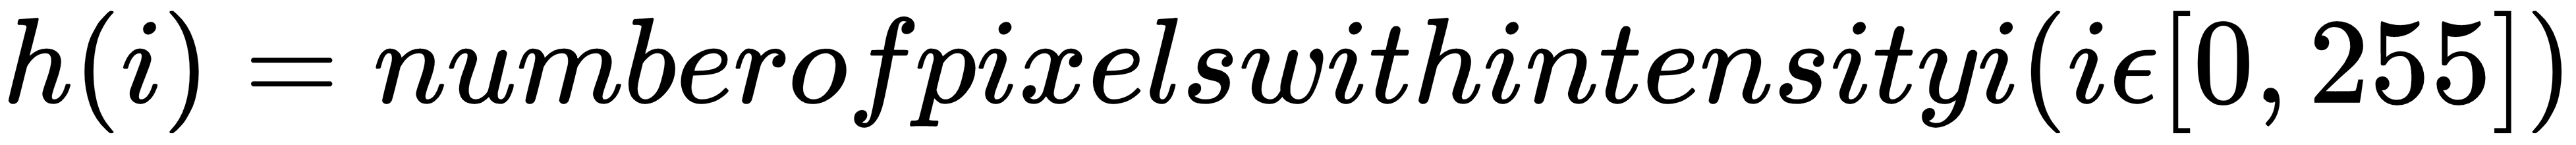

In [2]:
from IPython.display import Image
Image(filename='./images/input/histo.png',width=500)

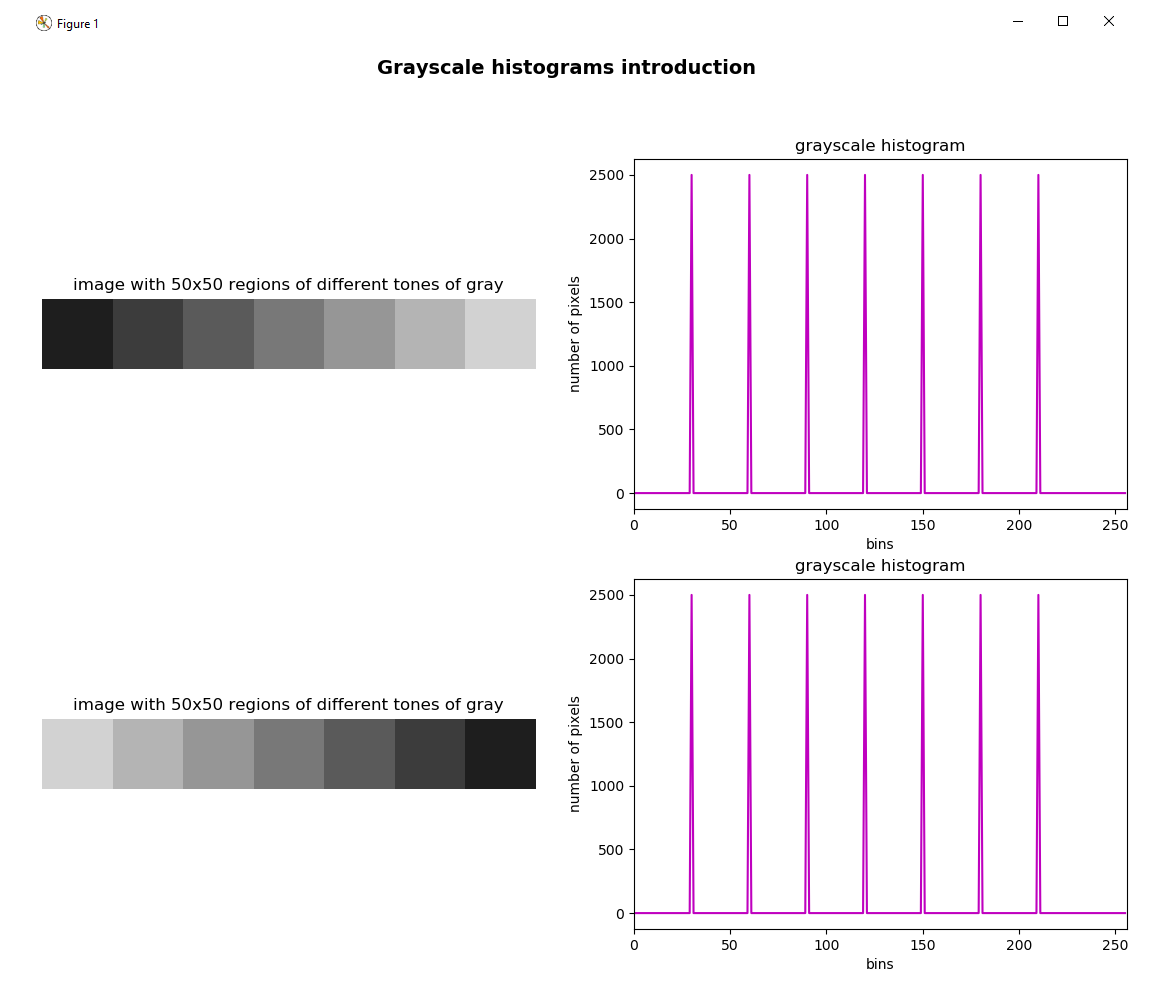

In [3]:
Image(filename='./images/input/grayhisto.png',width=500)

In [4]:
import numpy as np

In [8]:
tones = np.arange(start=60, stop=240, step=30)
result = np.ones((50, 50, 3), dtype="uint8") * 30
for tone in tones:
    img = np.ones((50, 50, 3), dtype="uint8") * tone
    result = np.concatenate((result, img), axis=1)

In [10]:
resultimg = np.fliplr(result)

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

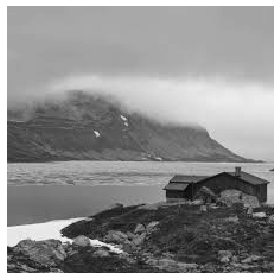

In [25]:
grey = cv2.imread('./images/input/img2.jpg', 0)
cv2.imshow('original grey', grey)
plt.axis('off')
plt.imshow(grey, cmap='gray')
plt.tight_layout()
plt.show()

In [26]:
hist, bins = np.histogram(grey, 256, [0, 255])

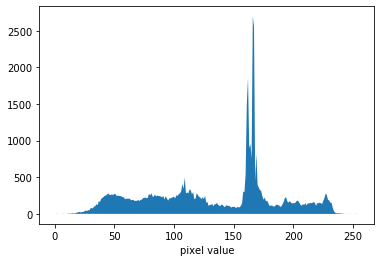

In [27]:
plt.fill(hist)
plt.xlabel('pixel value')
plt.show()


### Histogram terminology

- <b>bins:</b> The histograms in the previous screenshot show the number of pixels (frequency) for every tonal value, ranging from 0 to 255. Each of these 256 values is called a bin in histogram terminology. The number of bins can be selected as desired. Common values are 8, 16, 32, 64, 128, 256. OpenCV uses histSize to refer to bins.
- <b>range:</b>This is the range of intensity values we want to measure. Normally, it is [0,255], corresponding to all the tonal values (0 corresponds to black and 255 corresponds to white).

## Grayscale histograms

<font size="3" color="blue">cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])</font>

- images: It represents the source image of type uint8 or float32 provided as a list (example, [gray_img]).
- channels: It represents the index of the channel for which we calculate the histogram provided as a list (for example, [0] for grayscale images, or [0],[1],[2] for multi-channel images to calculate the histogram for the first, second, or third channel, respectively).
- mask: It represents a mask image to calculate the histogram of a specific region of the image defined by the mask. If this parameter is equal to None, the histogram will be calculated with no mask and the full image will be used.
- histSize: It represents the number of bins provided as a list (for example, [256]).
- ranges: It represents the range of intensity values we want to measure (for example, [0,256]).

In [63]:

def show_hist_with_matplotlib_gray(hist, title, pos, color):
    """Shows the histogram using matplotlib capabilities"""

    ax = plt.subplot(2, 3, pos)
    # plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])
    plt.plot(hist, color=color)

In [65]:
# Create the dimensions of the figure and set title:
plt.figure(figsize=(15, 6))
plt.suptitle("Grayscale histograms", fontsize=14, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('./images/input/img4.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<Figure size 1080x432 with 0 Axes>

In [66]:
# Calculate the histogram calling cv2.calcHist()
# The first argument it the list of images to process
# The second argument is the indexes of the channels to be used to calculate the histogram
# The third argument is a mask to compute the histogram for the masked pixels
# The fourth argument is a list containing the number of bins for each channel
# The fifth argument is the range of possible pixel values
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
# print("histogram shape: '{}'".format(hist.shape))

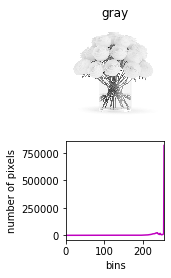

In [67]:
# Plot the grayscale image and the histogram:
show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_hist_with_matplotlib_gray(hist, "grayscale histogram", 4, 'm')

In [68]:
# Add 35 to every pixel on the grayscale image (the result will look lighter) and calculate histogram
M = np.ones(gray_image.shape, dtype="uint8") * 35
added_image = cv2.add(gray_image, M)
hist_added_image = cv2.calcHist([added_image], [0], None, [256], [0, 256])

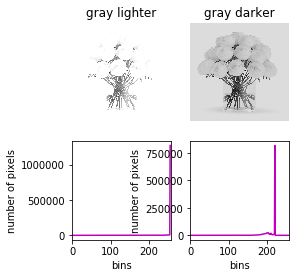

In [69]:
# Subtract 35 from every pixel (the result will look darker) and calculate histogram
subtracted_image = cv2.subtract(gray_image, M)
hist_subtracted_image = cv2.calcHist([subtracted_image], [0], None, [256], [0, 256])

# Write these images to disk to be used for histogram comparison (see exercise 'compare_histogram.py')
# cv2.imwrite("gray_image.png", gray_image)
# cv2.imwrite("gray_added_image.png", added_image)
# cv2.imwrite("gray_subtracted_image.png", subtracted_image)
# cv2.imwrite("gray_blurred.png", cv2.blur(gray_image, (10, 10)))

# Plot the images and the histograms:
show_img_with_matplotlib(cv2.cvtColor(added_image, cv2.COLOR_GRAY2BGR), "gray lighter", 2)
show_hist_with_matplotlib_gray(hist_added_image, "grayscale histogram", 5, 'm')
show_img_with_matplotlib(cv2.cvtColor(subtracted_image, cv2.COLOR_GRAY2BGR), "gray darker", 3)
show_hist_with_matplotlib_gray(hist_subtracted_image, "grayscale histogram", 6, 'm')

# Show the Figure:
plt.show()


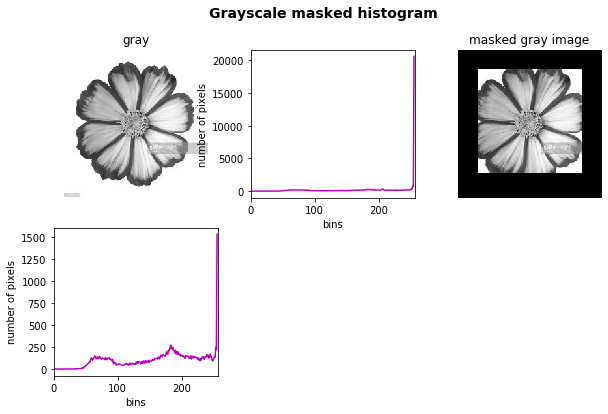

In [70]:

# Create the dimensions of the figure and set title:
plt.figure(figsize=(10, 6))
plt.suptitle("Grayscale masked histogram", fontsize=14, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('./images/input/img3.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram calling cv2.calcHist()
# The first argument it the list of images to process
# The second argument is the indexes of the channels to be used to calculate the histogram
# The third argument is a mask to compute the histogram for the masked pixels
# The fourth argument is a list containing the number of bins for each channel
# The fifth argument is the range of possible pixel values
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot the grayscale image and the histogram:
show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_hist_with_matplotlib_gray(hist, "grayscale histogram", 2, 'm')

# Create the mask and calculate the histogram using the mask:
mask = np.zeros(gray_image.shape[:2], np.uint8)
mask[30:190, 30:190] = 255
hist_mask = cv2.calcHist([gray_image], [0], mask, [256], [0, 256])

# Create the 'masked_img' (only for visualization) and show the grayscale masked histogram:
masked_img = cv2.bitwise_and(gray_image, gray_image, mask=mask)
show_img_with_matplotlib(cv2.cvtColor(masked_img, cv2.COLOR_GRAY2BGR), "masked gray image", 3)
show_hist_with_matplotlib_gray(hist_mask, "grayscale masked histogram", 4, 'm')

# Show the Figure:
plt.show()

### Color histograms

In [51]:
def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

In [53]:
def show_hist_with_matplotlib_rgb(hist, title, pos, color):
    """Shows the histogram using matplotlib capabilities"""

    ax = plt.subplot(2, 3, pos)
    # plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])

    for (h, c) in zip(hist, color):
        plt.plot(h, color=c)

In [54]:
def hist_color_img(img):
    """Calculates the histogram for a three-channel image"""

    histr = []
    histr.append(cv2.calcHist([img], [0], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [1], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [2], None, [256], [0, 256]))
    return histr

In [55]:
# Create the dimensions of the figure and set title:
plt.figure(figsize=(15, 6))
plt.suptitle("Color histograms", fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Color histograms')

<Figure size 1080x432 with 0 Axes>

In [56]:
# Load the original image:
image = cv2.imread('./images/input/img1.jpg')

In [57]:
# Calculate the histogram for this BGR image:
hist_color = hist_color_img(image)

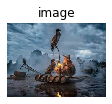

In [58]:
# Show the BGR image:
show_img_with_matplotlib(image, "image", 1)

In [59]:
# Add 15 to every pixel on the grayscale image (the result will look lighter) and calculate histogram:
M = np.ones(image.shape, dtype="uint8") * 15
added_image = cv2.add(image, M)
hist_color_added_image = hist_color_img(added_image)

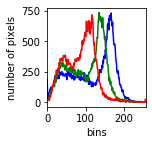

In [60]:
# Show the created histogram:
show_hist_with_matplotlib_rgb(hist_color, "color histogram", 4, ['b', 'g', 'r'])


In [61]:
# Subtract 15 from every pixel (the result will look darker) and calculate histogram:
subtracted_image = cv2.subtract(image, M)
hist_color_subtracted_image = hist_color_img(subtracted_image)

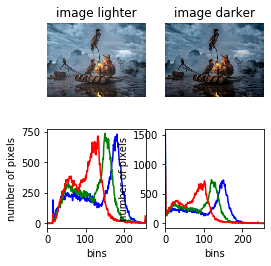

In [62]:

# Plot the images and the histograms:
show_img_with_matplotlib(added_image, "image lighter", 2)
show_hist_with_matplotlib_rgb(hist_color_added_image, "color histogram", 5, ['b', 'g', 'r'])
show_img_with_matplotlib(subtracted_image, "image darker", 3)
show_hist_with_matplotlib_rgb(hist_color_subtracted_image, "color histogram", 6, ['b', 'g', 'r'])

# Show the Figure:
plt.show()

## Custom visualizations of histograms

In [75]:
def plot_hist(hist_items, color):
    """Plots the histogram of a image"""

    # For visualization purposes we add some offset:
    offset_down = 10
    offset_up = 10
    # This will be used for creating the points to visualize (x-coordinates):
    x_values = np.arange(256).reshape(256, 1)
    # Create the canvas where the histogram will be plotted:
    canvas = np.ones((300, 256, 3), dtype="uint8") * 255

    for hist_item, col in zip(hist_items, color):
        # Normalize in the range for proper visualization:
        cv2.normalize(hist_item, hist_item, 0 + offset_down, 300 - offset_up, cv2.NORM_MINMAX)
        # Round the normalized values of the histogram:
        around = np.around(hist_item)
        # Cast the values to int:
        hist = np.int32(around)
        # Create the points using the histogram and the x-coordinates:
        pts = np.column_stack((x_values, hist))
        # Draw the points:
        cv2.polylines(canvas, [pts], False, col, 2)
        # Draw a rectangle:
        cv2.rectangle(canvas, (0, 0), (255, 298), (0, 0, 0), 1)

    # Flip the image in the up/down direction:
    res = np.flipud(canvas)
    return res

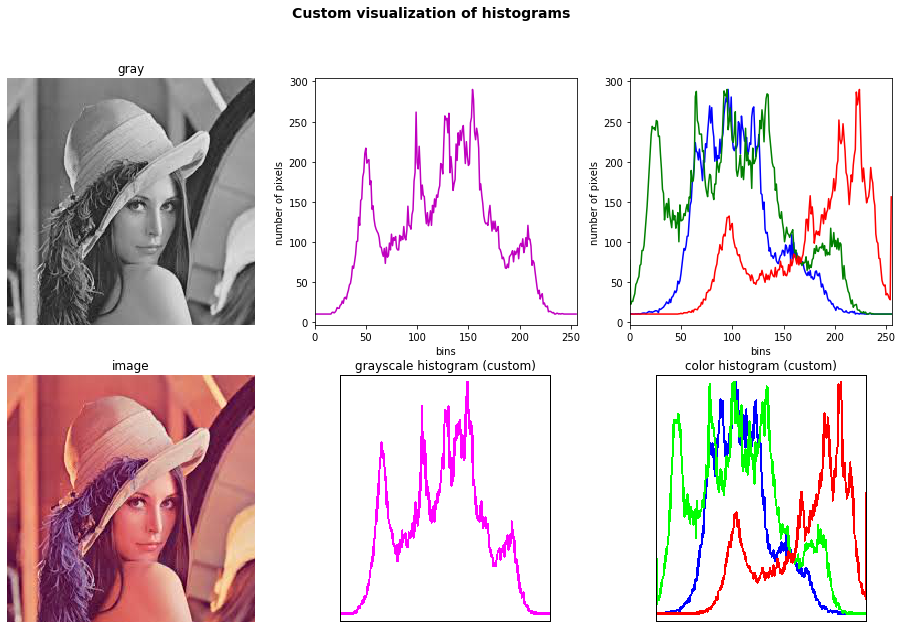

In [76]:

# Create the dimensions of the figure and set title:
plt.figure(figsize=(16, 10))
plt.suptitle("Custom visualization of histograms", fontsize=14, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('./images/input/lena.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram calling cv2.calcHist()
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Calculate the histogram for this BGR image:
hist_color = hist_color_img(image)

# Get the custom visualization for the grayscale histogram:
gray_plot = plot_hist([hist], [(255, 0, 255)])

# Get the custom visualization for the color histogram:
color_plot = plot_hist(hist_color, [(255, 0, 0), (0, 255, 0), (0, 0, 255)])

# Plot all the figures:
show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_img_with_matplotlib(image, "image", 4)
show_hist_with_matplotlib_gray(hist, "grayscale histogram (matplotlib)", 2, 'm')
show_hist_with_matplotlib_rgb(hist_color, "color histogram (matplotlib)", 3, ['b', 'g', 'r'])
show_img_with_matplotlib(gray_plot, "grayscale histogram (custom)", 5)
show_img_with_matplotlib(color_plot, "color histogram (custom)", 6)

# Show the Figure:
plt.show()

### Comparing OpenCV, NumPy, and Matplotlib histograms

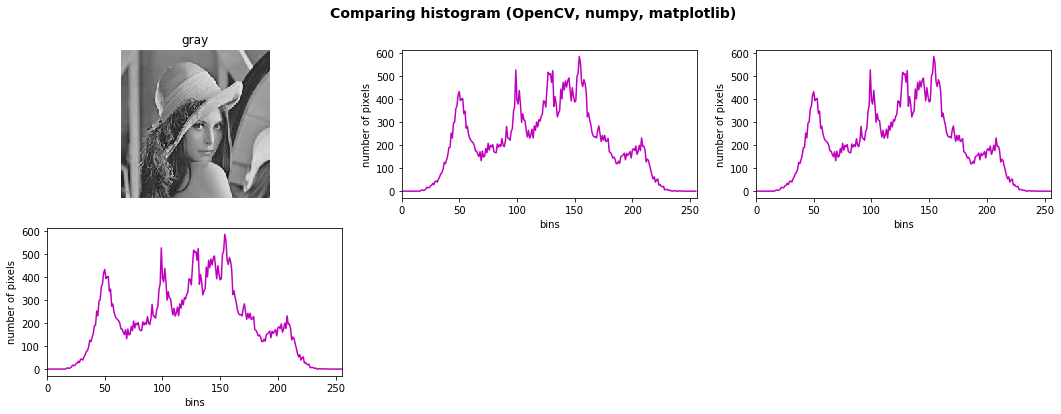

In [81]:
from timeit import default_timer as timer
plt.figure(figsize=(18, 6))
plt.suptitle("Comparing histogram (OpenCV, numpy, matplotlib)", fontsize=14, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('./images/input/lena.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Take the execution time (execution_time = end - start) for cv2.calcHist():
start = timer()
# Calculate the histogram calling cv2.calcHist()
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
end = timer()
exec_time_calc_hist = (end - start) * 1000

# Take the execution time (execution_time = end - start) for np.histogram():
start = timer()
# Calculate the histogram calling np.histogram():
hist_np, bins_np = np.histogram(gray_image.ravel(), 256, [0, 256])
end = timer()
exec_time_np_hist = (end - start) * 1000

# Take the execution time (execution_time = end - start) for plt.hist():
start = timer()
# Calculate the histogram calling plt.hist():
(n, bins, patches) = plt.hist(gray_image.ravel(), 256, [0, 256])
end = timer()
exec_time_plt_hist = (end - start) * 1000

# Plot the grayscale image and the histogram:
show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_hist_with_matplotlib_gray(hist, "grayscale histogram (OpenCV)-" + str('% 6.2f ms' % exec_time_calc_hist), 2, 'm')
show_hist_with_matplotlib_gray(hist_np, "grayscale histogram (Numpy)-" + str('% 6.2f ms' % exec_time_np_hist), 3, 'm')
show_hist_with_matplotlib_gray(n, "grayscale histogram (Matplotlib)-" + str('% 6.2f ms' % exec_time_plt_hist), 4, 'm')

# Show the Figure:
plt.show()

## Histogram equalization

<font size ="3" color="green">Histogram processing techniques provide a better method for altering the dynamic range of pixel values in an image so that its intensity histogram has a desired shape. As we have seen, image enhancement by the contrast stretching operation is limited in the sense that it can apply only linear scaling functions <br><br>
    Histogram processing techniques can be more powerful by employing non-linear (and non-monotonic) transfer functions to map the input pixel intensities to the output pixel intensities.
</font>

<font size="3" color="deeppink">Histogram equalization uses a monotonic and a non-linear mapping which reassigns the pixel intensity values in the input image in such a way that the output image has a uniform distribution of intensities (a flat histogram), and thereby enhances the contrast of the image.</font>

### Grayscale histogram equalization

In [83]:
# Create the dimensions of the figure and set title:
plt.figure(figsize=(18, 14))
plt.suptitle("Grayscale histogram equalization with cv2.equalizeHist()", fontsize=16, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('./images/input/lena.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Calculate the histogram calling cv2.calcHist()
# The first argument it the list of images to process
# The second argument is the indexes of the channels to be used to calculate the histogram
# The third argument is a mask to compute the histogram for the masked pixels
# The fourth argument is a list containing the number of bins for each channel
# The fifth argument is the range of possible pixel values
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

<Figure size 1296x1008 with 0 Axes>

In [84]:
# Equalize image and calculate histogram:
gray_image_eq = cv2.equalizeHist(gray_image)
hist_eq = cv2.calcHist([gray_image_eq], [0], None, [256], [0, 256])

In [85]:
# Add 35 to every pixel on the grayscale image (the result will look lighter) and calculate histogram:
M = np.ones(gray_image.shape, dtype="uint8") * 35
added_image = cv2.add(gray_image, M)
hist_added_image = cv2.calcHist([added_image], [0], None, [256], [0, 256])

In [86]:
#Equalize image and calculate histogram:
added_image_eq = cv2.equalizeHist(added_image)
hist_eq_added_image = cv2.calcHist([added_image_eq], [0], None, [256], [0, 256])

In [87]:
# Subtract 35 from every pixel (the result will look darker) and calculate histogram:
subtracted_image = cv2.subtract(gray_image, M)
hist_subtracted_image = cv2.calcHist([subtracted_image], [0], None, [256], [0, 256])

In [88]:
# Equalize image and calculate histogram:
subtracted_image_eq = cv2.equalizeHist(subtracted_image)
hist_eq_subtracted_image = cv2.calcHist([subtracted_image_eq], [0], None, [256], [0, 256])

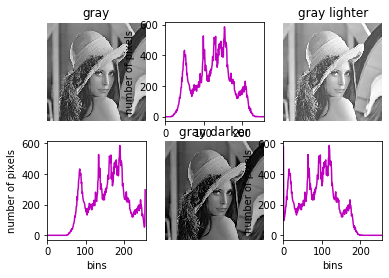

In [110]:
# Plot the images and the histograms (without equalization first):
show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_hist_with_matplotlib_gray(hist, "grayscale histogram", 2, 'm')
show_img_with_matplotlib(cv2.cvtColor(added_image, cv2.COLOR_GRAY2BGR), "gray lighter", 3)
show_hist_with_matplotlib_gray(hist_added_image, "grayscale histogram", 4, 'm')
show_img_with_matplotlib(cv2.cvtColor(subtracted_image, cv2.COLOR_GRAY2BGR), "gray darker", 5)
show_hist_with_matplotlib_gray(hist_subtracted_image, "grayscale histogram", 6, 'm')

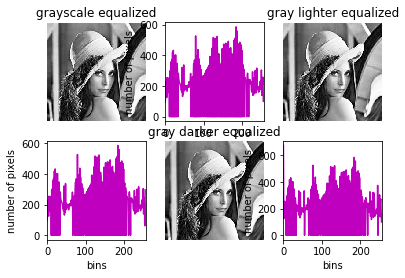

In [111]:
# Plot the images and the histograms (with equalization):
show_img_with_matplotlib(cv2.cvtColor(gray_image_eq, cv2.COLOR_GRAY2BGR), "grayscale equalized", 1)
show_hist_with_matplotlib_gray(hist_eq, "grayscale equalized histogram", 2, 'm')
show_img_with_matplotlib(cv2.cvtColor(added_image_eq, cv2.COLOR_GRAY2BGR), "gray lighter equalized", 3)
show_hist_with_matplotlib_gray(hist_eq_added_image, "grayscale equalized histogram", 4, 'm')
show_img_with_matplotlib(cv2.cvtColor(subtracted_image_eq, cv2.COLOR_GRAY2BGR), "gray darker equalized", 5)
show_hist_with_matplotlib_gray(hist_eq_subtracted_image, "grayscale equalized histogram", 6, 'm')

### Color histogram equalization

In [112]:
def equalize_hist_color(img):
    """Equalize the image splitting the image applying cv2.equalizeHist() to each channel and merging the results"""

    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cv2.equalizeHist(ch))

    eq_image = cv2.merge(eq_channels)
    return eq_image

In [113]:
# Calculate the histogram for this BGR image:
hist_color = hist_color_img(image)

In [114]:
# Equalize the image and calculate histogram:
image_eq = equalize_hist_color(image)
hist_image_eq = hist_color_img(image_eq)

In [115]:
# Add 15 to every pixel on the grayscale image (the result will look lighter) and calculate histogram
M = np.ones(image.shape, dtype="uint8") * 15
added_image = cv2.add(image, M)
hist_color_added_image = hist_color_img(added_image)

In [116]:
# Equalize image and calculate histogram
added_image_eq = equalize_hist_color(added_image)
hist_added_image_eq = hist_color_img(added_image_eq)

In [118]:
# # Equalize image and calculate histogram
# subtracted_image_eq = equalize_hist_color(subtracted_image)
# hist_subtracted_image_eq = hist_color_img(subtracted_image_eq)

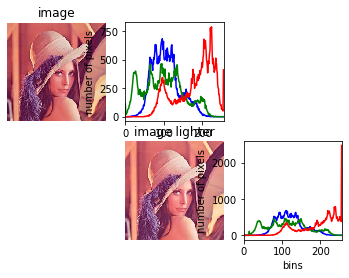

In [119]:
# Plot the images and the histograms (without equalization first)
show_img_with_matplotlib(image, "image", 1)
show_hist_with_matplotlib_rgb(hist_color, "color histogram", 2, ['b', 'g', 'r'])
show_img_with_matplotlib(added_image, "image lighter", 5)
show_hist_with_matplotlib_rgb(hist_color_added_image, "color histogram", 6, ['b', 'g', 'r'])
# show_img_with_matplotlib(subtracted_image, "image darker", 9)
# show_hist_with_matplotlib_rgb(hist_color_subtracted_image, "color histogram", 10, ['b', 'g', 'r'])

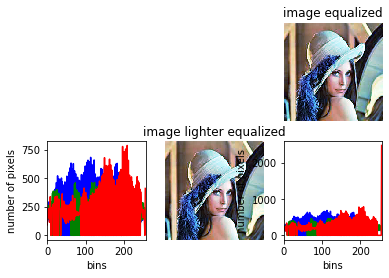

In [122]:
# Plot the images and the histograms (with equalization)
show_img_with_matplotlib(image_eq, "image equalized", 3)
show_hist_with_matplotlib_rgb(hist_image_eq, "color histogram equalized", 4, ['b', 'g', 'r'])
show_img_with_matplotlib(added_image_eq, "image lighter equalized", 5)
show_hist_with_matplotlib_rgb(hist_added_image_eq, "color histogram equalized", 6, ['b', 'g', 'r'])
# show_img_with_matplotlib(subtracted_image_eq, "image darker equalized", 11)
# show_hist_with_matplotlib_rgb(hist_subtracted_image_eq, "color histogram equalized", 12, ['b', 'g', 'r'])

## Contrast Limited Adaptive Histogram Equalization

In [126]:
# Import required packages:
import cv2
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 5, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def equalize_clahe_color_hsv(img):
    """Equalize the image splitting it after conversion to HSV and applying CLAHE
    to the V channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    eq_V = cla.apply(V)
    eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
    return eq_image


def equalize_clahe_color_lab(img):
    """Equalize the image splitting it after conversion to LAB and applying CLAHE
    to the L channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    L, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2Lab))
    eq_L = cla.apply(L)
    eq_image = cv2.cvtColor(cv2.merge([eq_L, a, b]), cv2.COLOR_Lab2BGR)
    return eq_image


def equalize_clahe_color_yuv(img):
    """Equalize the image splitting it after conversion to YUV and applying CLAHE
    to the Y channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    Y, U, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2YUV))
    eq_Y = cla.apply(Y)
    eq_image = cv2.cvtColor(cv2.merge([eq_Y, U, V]), cv2.COLOR_YUV2BGR)
    return eq_image


def equalize_clahe_color(img):
    """Equalize the image splitting the image applying CLAHE to each channel
    and merging the results
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cla.apply(ch))

    eq_image = cv2.merge(eq_channels)
    return eq_image




In [132]:
# Create the dimensions of the figure and set title:
plt.figure(figsize=(18, 14))
plt.suptitle("Histogram equalization using CLAHE", fontsize=16, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('./images/input/lena.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create clahe:
clahe = cv2.createCLAHE(clipLimit=2.0)
# Apply CLAHE to the grayscale image varying clipLimit parameter:
gray_image_clahe = clahe.apply(gray_image)
clahe.setClipLimit(5.0)
gray_image_clahe_2 = clahe.apply(gray_image)
clahe.setClipLimit(10.0)
gray_image_clahe_3 = clahe.apply(gray_image)
clahe.setClipLimit(20.0)
gray_image_clahe_4 = clahe.apply(gray_image)


<Figure size 1296x1008 with 0 Axes>

/home/tcs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


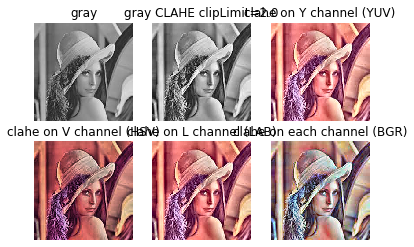

In [134]:
# Now, try the four created functions for equalize color images using CLAHE:
image_clahe_color = equalize_clahe_color(image)
image_clahe_color_lab = equalize_clahe_color_lab(image)
image_clahe_color_hsv = equalize_clahe_color_hsv(image)
image_clahe_color_yuv = equalize_clahe_color_yuv(image)

# Plot all the images
show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=2.0", 2)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_2, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=5.0", 3)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_3, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=10.0", 4)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_4, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=20.0", 5)
show_img_with_matplotlib(image, "color", 6)
show_img_with_matplotlib(image_clahe_color, "clahe on each channel (BGR)", 6)
show_img_with_matplotlib(image_clahe_color_lab, "clahe on L channel (LAB)", 5)
show_img_with_matplotlib(image_clahe_color_hsv, "clahe on V channel (HSV)", 4)
show_img_with_matplotlib(image_clahe_color_yuv, "clahe on Y channel (YUV)", 3)

# Show the Figure:
plt.show()

### Comparing CLAHE and histogram equalization

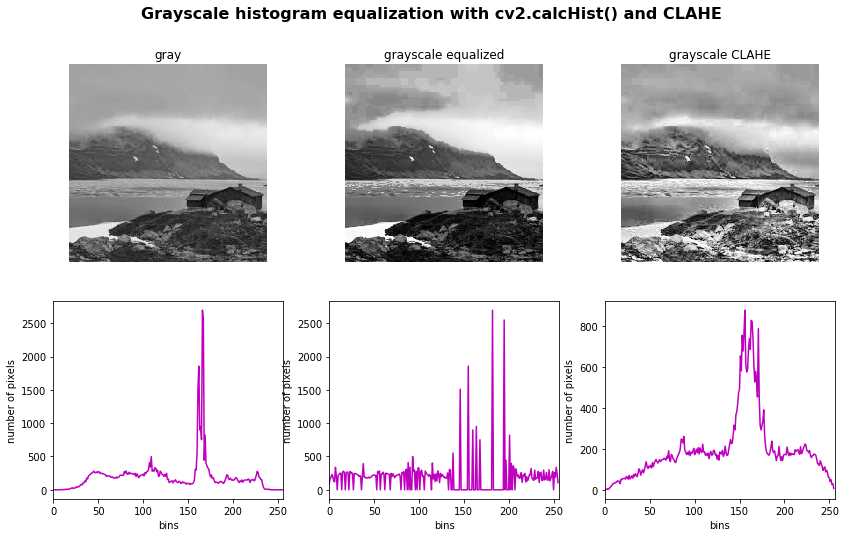

In [129]:
import cv2
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def show_hist_with_matplotlib_gray(hist, title, pos, color):
    """Shows the histogram using matplotlib capabilities"""

    ax = plt.subplot(2, 3, pos)
    # plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])
    plt.plot(hist, color=color)


# Create the dimensions of the figure and set title:
plt.figure(figsize=(14, 8))
plt.suptitle("Grayscale histogram equalization with cv2.calcHist() and CLAHE", fontsize=16, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('./images/input/img2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram calling cv2.calcHist()
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Equalize image and calculate histogram
gray_image_eq = cv2.equalizeHist(gray_image)
hist_eq = cv2.calcHist([gray_image_eq], [0], None, [256], [0, 256])

# Create clahe:
clahe = cv2.createCLAHE(clipLimit=4.0)

# Apply CLAHE to the gryscale image and calculate histogram:
gray_image_clahe = clahe.apply(gray_image)
hist_clahe = cv2.calcHist([gray_image_clahe], [0], None, [256], [0, 256])

show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_hist_with_matplotlib_gray(hist, "grayscale histogram", 4, 'm')
show_img_with_matplotlib(cv2.cvtColor(gray_image_eq, cv2.COLOR_GRAY2BGR), "grayscale equalized", 2)
show_hist_with_matplotlib_gray(hist_eq, "grayscale equalized histogram", 5, 'm')
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe, cv2.COLOR_GRAY2BGR), "grayscale CLAHE", 3)
show_hist_with_matplotlib_gray(hist_clahe, "grayscale clahe histogram", 6, 'm')

# Show the Figure:
plt.show()

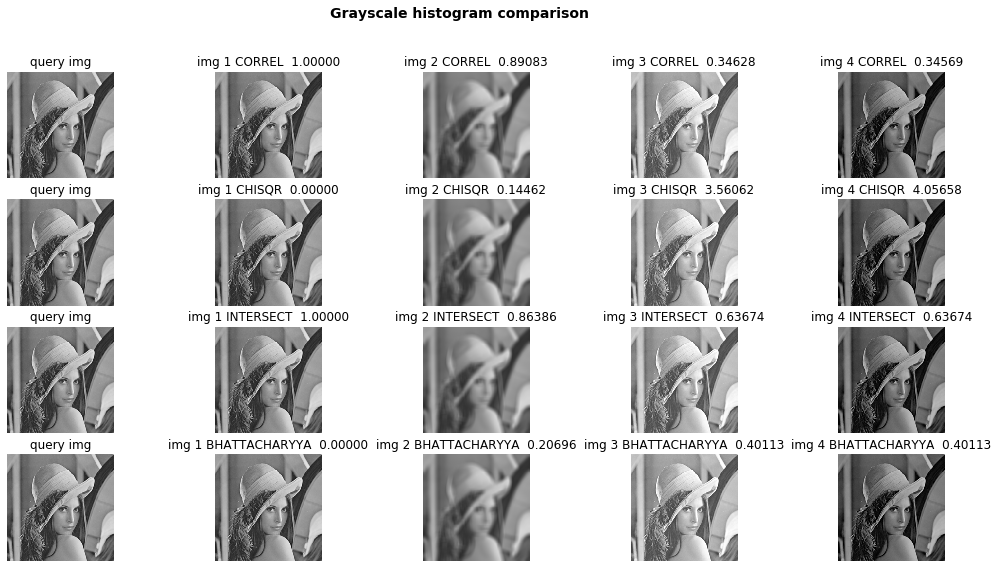

In [135]:

# Import required packages:
import cv2
from matplotlib import pyplot as plt
import os

# Name and path of the test images to load:
image_names = ['gray_image.png', 'gray_blurred.png', 'gray_added_image.png', 'gray_subtracted_image.png']
path = './images/input'


# Load all test images building the relative path using 'os.path.join'
def load_all_test_images():
    """Loads all the test images to be used for testing"""

    images = []
    for index_image, name_image in enumerate(image_names):
        # Build the relative path where the current image is:
        image_path = os.path.join(path, name_image)
        # print("image_path: '{}'".format(image_path))
        # Read the image and add it (append) to the structure 'images'
        images.append(cv2.imread(image_path, 0))
    # Return all the loaded test images:
    return images


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(4, 5, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def show_hist_with_matplotlib_gray(hist, title, pos, color):
    """Shows the histogram using matplotlib capabilities"""

    ax = plt.subplot(2, 5, pos)
    # plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])
    plt.plot(hist, color=color)


# Create the dimensions of the figure and set title:
plt.figure(figsize=(18, 9))
plt.suptitle("Grayscale histogram comparison", fontsize=14, fontweight='bold')

# We load all the test images:
test_images = load_all_test_images()
hists = []

# Calculate the histograms for every image:
for img in test_images:
    # Calculate histogram:
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    # Normalize histogram:
    hist = cv2.normalize(hist, hist, norm_type=cv2.NORM_L1)
    # Add histogram to hists:
    hists.append(hist)

# Perform all the comparisons using all the available metrics, and show the results:
gray_gray = cv2.compareHist(hists[0], hists[0], cv2.HISTCMP_CORREL)
gray_grayblurred = cv2.compareHist(hists[0], hists[1], cv2.HISTCMP_CORREL)
gray_addedgray = cv2.compareHist(hists[0], hists[2], cv2.HISTCMP_CORREL)
gray_subgray = cv2.compareHist(hists[0], hists[3], cv2.HISTCMP_CORREL)

show_img_with_matplotlib(cv2.cvtColor(test_images[0], cv2.COLOR_GRAY2BGR), "query img", 1)
show_img_with_matplotlib(cv2.cvtColor(test_images[0], cv2.COLOR_GRAY2BGR), "img 1 " + str('CORREL % 6.5f' % gray_gray),
                         2)
show_img_with_matplotlib(cv2.cvtColor(test_images[1], cv2.COLOR_GRAY2BGR),
                         "img 2 " + str('CORREL % 6.5f' % gray_grayblurred), 3)
show_img_with_matplotlib(cv2.cvtColor(test_images[2], cv2.COLOR_GRAY2BGR),
                         "img 3 " + str('CORREL % 6.5f' % gray_addedgray), 4)
show_img_with_matplotlib(cv2.cvtColor(test_images[3], cv2.COLOR_GRAY2BGR),
                         "img 4 " + str('CORREL % 6.5f' % gray_subgray), 5)

gray_gray = cv2.compareHist(hists[0], hists[0], cv2.HISTCMP_CHISQR)
gray_grayblurred = cv2.compareHist(hists[0], hists[1], cv2.HISTCMP_CHISQR)
gray_addedgray = cv2.compareHist(hists[0], hists[2], cv2.HISTCMP_CHISQR)
gray_subgray = cv2.compareHist(hists[0], hists[3], cv2.HISTCMP_CHISQR)

show_img_with_matplotlib(cv2.cvtColor(test_images[0], cv2.COLOR_GRAY2BGR), "query img", 6)
show_img_with_matplotlib(cv2.cvtColor(test_images[0], cv2.COLOR_GRAY2BGR), "img 1 " + str('CHISQR % 6.5f' % gray_gray),
                         7)
show_img_with_matplotlib(cv2.cvtColor(test_images[1], cv2.COLOR_GRAY2BGR),
                         "img 2 " + str('CHISQR % 6.5f' % gray_grayblurred), 8)
show_img_with_matplotlib(cv2.cvtColor(test_images[2], cv2.COLOR_GRAY2BGR),
                         "img 3 " + str('CHISQR % 6.5f' % gray_addedgray), 9)
show_img_with_matplotlib(cv2.cvtColor(test_images[3], cv2.COLOR_GRAY2BGR),
                         "img 4 " + str('CHISQR % 6.5f' % gray_subgray), 10)

gray_gray = cv2.compareHist(hists[0], hists[0], cv2.HISTCMP_INTERSECT)
gray_grayblurred = cv2.compareHist(hists[0], hists[1], cv2.HISTCMP_INTERSECT)
gray_addedgray = cv2.compareHist(hists[0], hists[2], cv2.HISTCMP_INTERSECT)
gray_subgray = cv2.compareHist(hists[0], hists[3], cv2.HISTCMP_INTERSECT)

show_img_with_matplotlib(cv2.cvtColor(test_images[0], cv2.COLOR_GRAY2BGR), "query img", 11)
show_img_with_matplotlib(cv2.cvtColor(test_images[0], cv2.COLOR_GRAY2BGR),
                         "img 1 " + str('INTERSECT % 6.5f' % gray_gray), 12)
show_img_with_matplotlib(cv2.cvtColor(test_images[1], cv2.COLOR_GRAY2BGR),
                         "img 2 " + str('INTERSECT % 6.5f' % gray_grayblurred), 13)
show_img_with_matplotlib(cv2.cvtColor(test_images[2], cv2.COLOR_GRAY2BGR),
                         "img 3 " + str('INTERSECT % 6.5f' % gray_addedgray), 14)
show_img_with_matplotlib(cv2.cvtColor(test_images[3], cv2.COLOR_GRAY2BGR),
                         "img 4 " + str('INTERSECT % 6.5f' % gray_subgray), 15)

gray_gray = cv2.compareHist(hists[0], hists[0], cv2.HISTCMP_BHATTACHARYYA)
gray_grayblurred = cv2.compareHist(hists[0], hists[1], cv2.HISTCMP_BHATTACHARYYA)
gray_addedgray = cv2.compareHist(hists[0], hists[2], cv2.HISTCMP_BHATTACHARYYA)
gray_subgray = cv2.compareHist(hists[0], hists[3], cv2.HISTCMP_BHATTACHARYYA)

show_img_with_matplotlib(cv2.cvtColor(test_images[0], cv2.COLOR_GRAY2BGR), "query img", 16)
show_img_with_matplotlib(cv2.cvtColor(test_images[0], cv2.COLOR_GRAY2BGR),
                         "img 1 " + str('BHATTACHARYYA % 6.5f' % gray_gray), 17)
show_img_with_matplotlib(cv2.cvtColor(test_images[1], cv2.COLOR_GRAY2BGR),
                         "img 2 " + str('BHATTACHARYYA % 6.5f' % gray_grayblurred), 18)
show_img_with_matplotlib(cv2.cvtColor(test_images[2], cv2.COLOR_GRAY2BGR),
                         "img 3 " + str('BHATTACHARYYA % 6.5f' % gray_addedgray), 19)
show_img_with_matplotlib(cv2.cvtColor(test_images[3], cv2.COLOR_GRAY2BGR),
                         "img 4 " + str('BHATTACHARYYA % 6.5f' % gray_subgray), 20)

# Show the Figure:
plt.show()

## Histogram matching